<a href="https://colab.research.google.com/github/farielshafee2018/Amazon-FC/blob/main/Amazon_Youtube_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
youtube_df = pd.read_csv('/content/youtube_data_cleaned(2).csv')

This notebook finds the sentiment and polarity of Youtube comments about work in Amazon Warehouse.

In [ ]:
youtube_df.head(2)

,Unnamed: 0,S No.,Link,Upload Date,Views,Likes,Comments,Transcript/Transcript Link,transcript_cleaned
0,0,NaN,https://www.youtube.com/watch?v=bU1xOB4oT8E,2025-01-06,1079,83,0,I hate my job. Most physical job in the buildi...,hate job physical job building feel like numbe...
1,1,2.0,https://www.youtube.com/watch?v=FnK9JEL62x8,2024-10-03,503,12,0,"knocked my camera, eternal transfer",knocked camera eternal transfer


In [ ]:
!pip install textblob

from textblob import TextBlob

youtube_df['sentiment_polarity'] = youtube_df['transcript_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
youtube_df['sentiment_subjectivity'] = youtube_df['transcript_cleaned'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

This part finds the polarity of sentiments
```



In [ ]:
def label_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

youtube_df['sentiment_label'] = youtube_df['sentiment_polarity'].apply(label_sentiment)

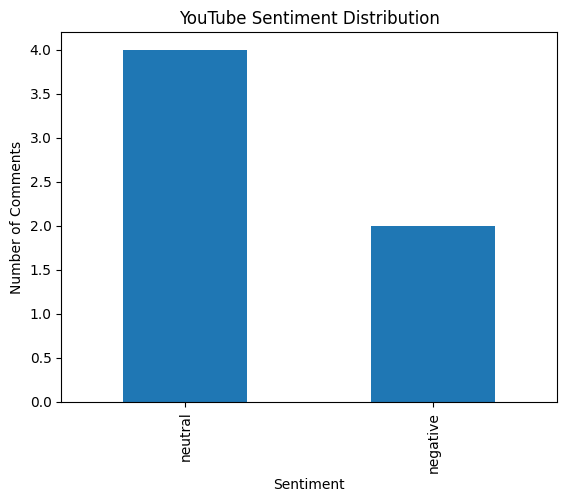

In [ ]:

import matplotlib.pyplot as plt

youtube_df['sentiment_label'].value_counts().plot(kind='bar', title="YouTube Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()

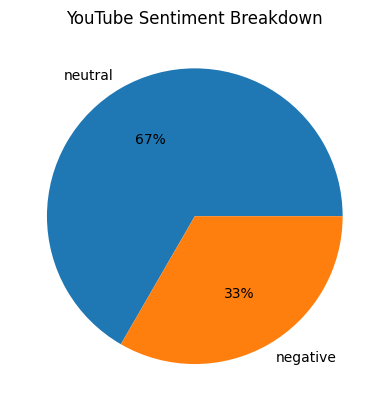

In [ ]:
youtube_df['sentiment_label'].value_counts().plot(
    kind='pie',
    autopct='%1.0f%%',
    title="YouTube Sentiment Breakdown"
)
plt.ylabel('')
plt.show()

In [ ]:
youtube_df.to_csv('youtube_sentiment.csv', index=False)